# Comparison of two VonMisesFisher sampler implementations

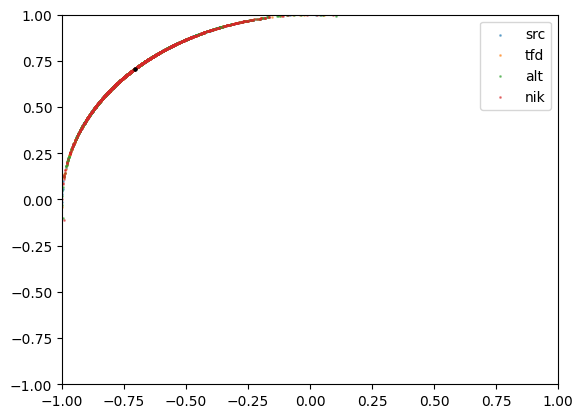

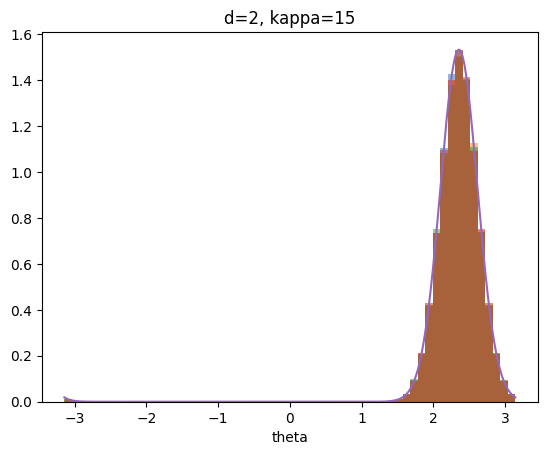

In [11]:
from importlib import reload
import VMF_alt
reload(VMF_alt)
from VMF_alt import random_VMF, theta_arg_max, random_VMF_mu0
from VMF_src import rand_von_mises_fisher, plot_3d_scatter, rand_uniform_hypersphere


import matplotlib.pyplot as plt
import numpy as np
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Hide unnecesary tensorflow logs about GPU
import tensorflow_probability as tfp
tfd = tfp.distributions

from VMF_niko_brummer import rotate_to_mu_householder, sample_vmf_canonical_mu



n = 10**5
d = 2
theta0 = 135 * np.pi / 180
mu = np.array([np.cos(theta0), np.sin(theta0)])
kappa = 15

x1 = rand_von_mises_fisher(mu, kappa, n)
x2 = random_VMF(mu, kappa, n)
x3 = tfd.VonMisesFisher([*mu.astype(float)], float(kappa)).sample(n).numpy()


def VMF_niko(mu, kappa, n):
    # mu0 = np.zeros_like(mu)
    # mu0[0] = 1
    # X = random_VMF(mu0, kappa, n)
    X = random_VMF_mu0(d, kappa, n)
    # X = sample_vmf_canonical_mu(d, kappa) # Not vectorized
    return rotate_to_mu_householder(X, mu)
x4 = VMF_niko(mu, kappa, n)

mask = np.random.random(n) < 1000/n
plt.scatter(x1[mask,0], x1[mask,1], s=1, alpha=0.5, label="src")
plt.scatter(x2[mask,0], x2[mask,1], s=1, alpha=0.5, label="tfd")
plt.scatter(x3[mask,0], x3[mask,1], s=1, alpha=0.5, label="alt")
plt.scatter(x4[mask,0], x4[mask,1], s=1, alpha=0.5, label="nik")
plt.scatter([mu[0]], [mu[1]], color='black', s=5)
plt.legend()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

theta1 = np.arctan2(x1[:,1], x1[:,0])
theta2 = np.arctan2(x2[:,1], x2[:,0])
theta3 = np.arctan2(x3[:,1], x3[:,0])
theta4 = np.arctan2(x4[:,1], x4[:,0])
plt.hist(theta1, alpha=0.5, density=True, bins=60, label="src")
plt.hist(theta2, alpha=0.5, density=True, bins=60, label="tfd")
plt.hist(theta3, alpha=0.5, density=True, bins=60, label="alt")
plt.hist(theta4, alpha=0.5, density=True, bins=60, label="alt")
plt.title(f"d={d}, kappa={kappa}")

theta = np.linspace(-np.pi,np.pi, 10**4)
with np.errstate(over="raise", divide="raise"):
    try:
        Y = np.exp(kappa*np.cos(theta-theta0))
        Y /= np.trapz(Y, x=theta)
    except FloatingPointError:
        Y = np.exp(np.cos(theta-theta0))
        Y /= np.max(Y)
        Y = Y**kappa
        Y /= np.trapz(Y, x=theta)
plt.plot(theta, Y, label='theory')
plt.xlabel('theta')
plt.show()


In [ ]:
# import timeit
# import VMF_alt
# reload(VMF_alt)
# from VMF_alt import random_VMF, theta_arg_max, _acceptance_test


# out = []

# def f(extra_p):
#     for kappa in [50, 100, 1e3]:
#         for d in [2, 3, 5, 15]:
#             #print(f"kappa={kappa}, d={d}")
#             _acceptance_test(d, kappa, n)
#     return

# # for n in [1,2,3,5,100,1000,10000,100000]:
# #     nTimeIt = max(1, int(10000 / n**0.5))
# #     for extra_p in [0.0,0.02,0.05, 0.1, 0.3]:
# #         print(n, extra_p, timeit.timeit(lambda: f(extra_p), number=nTimeIt) / nTimeIt * 1e3)

# kappa = 2.0
# d = 2
# N = 2**np.arange(18)
# out = np.array([_acceptance_test(d, kappa, n, repeat=50) for n in N])
# plt.plot(N, out[:,0], label="acc")
# plt.xlabel('n')
# plt.show()
# # plt.plot(N, out[:,1], label="time")
# # plt.xlabel('n')
# # plt.show()

# Out = []
# Kappa = [1e-3, 1e-1, 1, 2, 10, 50, 100, 200,300,500]
# n = 20000
# D = [2, 3, 5, 15, 100, 500, 1000, 1500, 2000]
# for d in D:
#     out = np.array([_acceptance_test(d, kappa, n, repeat=100) for kappa in Kappa])
#     Out.append(out[:,0])

# for d, out in zip(D, Out):
#     plt.plot(Kappa, out, label=f"acc d={d}")
# plt.ylabel('acceptance')
# plt.xlabel('kappa')
# plt.legend()
# plt.show()
# # plt.plot(N, out[:,1], label="time")
# # plt.xlabel('n')
# # plt.show()


In [ ]:

# # for d, out in zip(D, Out):
# #     plt.plot(Kappa, out, label=f"acc d={d}")

# end = np.array([out[-1] for out in Out])
# # end -= 0.6577
# # end /= 1-0.657
# # plt.plot(D, end)
# # plt.plot(D, end/(1-end))
# # plt.plot(D, 1/(1-end))
# # plt.plot(D, 1/(1-end)**0.5)
# plt.plot(D, end)
# end = 1/(1 - np.log(end))
# plt.plot(D, end)
# end = 1/(1 - np.log(end))
# plt.plot(D, end)
# plt.plot(D, 1/(1-np.log(end)))
# # plt.plot(D, -np.log(end))
# # plt.plot(D, 1/(1-end)**0.5 - np.array(D)/450)
# # plt.plot(D, np.log(1/(1-end)) - 1.05 - np.array(D)/800)
# # plt.ylabel('acceptance')
# plt.xlabel('d')
# plt.show()

In [20]:
import timeit

nTimeIt = 200
for n in [1000]:
    for kappa in [1, 50]:
        for d in [2, 3, 5, 15, 25, 50]:
            print(f"n={n}, kappa={kappa}, d={d}")
            mu = rand_uniform_hypersphere(1, d)[0]

            f1 = lambda: rand_von_mises_fisher(mu, kappa, n)
            t1 = timeit.timeit(f1, number=nTimeIt) / nTimeIt * 1e3
            print(f"  ref : {t1:5.2f}ms")

            # f2 = lambda: tfd.VonMisesFisher([*mu.astype(float)], float(kappa)).sample(n).numpy()
            # t2 = timeit.timeit(f2, number=nTimeIt) / nTimeIt * 1e3
            # print(f"  tfd: {t2:.2f}ms")

            f3 = lambda: random_VMF(mu, kappa, n)
            t3 = timeit.timeit(f3, number=nTimeIt) / nTimeIt * 1e3
            print(f"  ours: {t3:5.2f}ms")

            f4 = lambda: VMF_niko(mu, kappa, n)
            t4 = timeit.timeit(f4, number=nTimeIt) / nTimeIt * 1e3
            print(f"  niko: {t4:5.2f}ms")


n=1000, kappa=1, d=2
  ref : 14.38ms
  ours:  0.55ms
  niko:  0.52ms
n=1000, kappa=1, d=3
  ref : 10.87ms
  ours:  0.67ms
  niko:  0.71ms
n=1000, kappa=1, d=5
  ref : 10.01ms
  ours:  0.67ms
  niko:  0.70ms
n=1000, kappa=1, d=15
  ref : 10.39ms
  ours:  2.32ms
  niko:  4.09ms
n=1000, kappa=1, d=25
  ref : 40.74ms
  ours:  6.86ms
  niko:  6.17ms
n=1000, kappa=1, d=50
  ref : 42.06ms
  ours: 10.34ms
  niko:  9.74ms
n=1000, kappa=50, d=2
  ref : 21.34ms
  ours:  0.99ms
  niko:  0.93ms
n=1000, kappa=50, d=3
  ref : 20.18ms
  ours:  1.16ms
  niko:  1.14ms
n=1000, kappa=50, d=5
  ref : 20.76ms
  ours:  1.20ms
  niko:  1.06ms
n=1000, kappa=50, d=15
  ref : 21.05ms
  ours:  4.94ms
  niko:  6.91ms
n=1000, kappa=50, d=25
  ref : 45.75ms
  ours:  5.76ms
  niko:  5.51ms
n=1000, kappa=50, d=50
  ref : 45.86ms
  ours:  9.35ms
  niko: 11.18ms


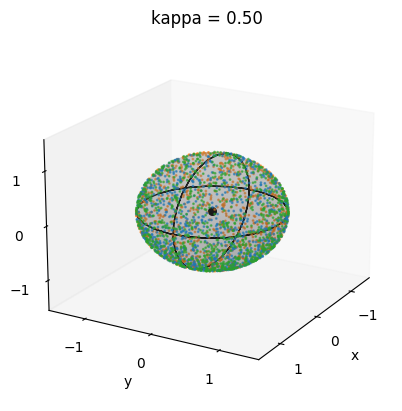

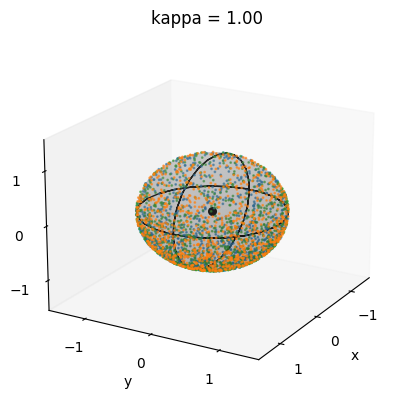

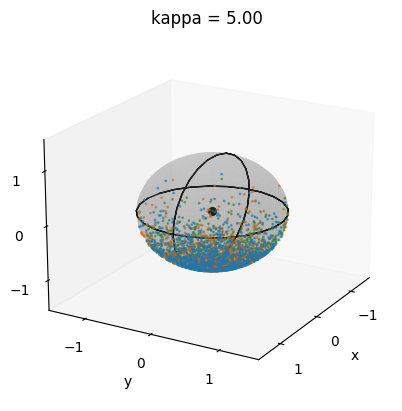

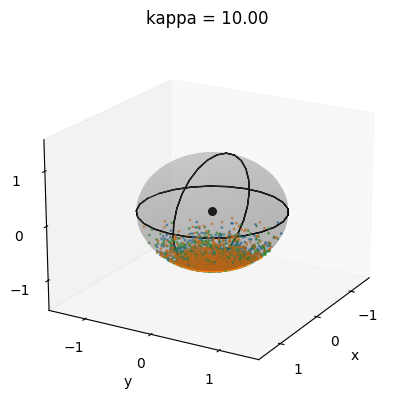

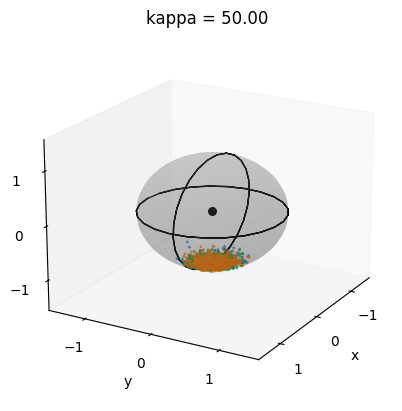

In [3]:
d = 3
n = 1000
mu = np.array([0, 0, -1])


for kappa in [0.5, 1, 5, 10, 50]:
    x1 = rand_von_mises_fisher(mu, kappa, n)
    x2 = tfd.VonMisesFisher([*mu.astype(float)], float(kappa)).sample(n).numpy()
    x3 = random_VMF(mu, kappa, n)

    ax = plot_3d_scatter(
        np.zeros((1, 3)), colour="black", sph=True, sph_alpha=0.2,
    )

    kw = {"s": 1, "alpha": 0.6}
    ax.scatter(x1[:, 0], x1[:, 1], x1[:, 2], label="src", **kw)
    ax.scatter(x2[:, 0], x2[:, 1], x2[:, 2], label="tfd", **kw)
    ax.scatter(x3[:, 0], x3[:, 1], x3[:, 2], label="alt", **kw)
    ax.view_init(20,30)
    plt.title(f"kappa = {kappa:.02f}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
